In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/FinalProject/train.csv",parse_dates = ['Dates'])
test = pd.read_csv("/content/drive/MyDrive/FinalProject/test.csv",parse_dates = ['Dates'])

In [ ]:
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Id          884262 non-null  int64         
 1   Dates       884262 non-null  datetime64[ns]
 2   DayOfWeek   884262 non-null  object        
 3   PdDistrict  884262 non-null  object        
 4   Address     884262 non-null  object        
 5   X           884262 non-null  float64       
 6   Y           884262 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 47.2+ MB


In [ ]:
#We will delete any duplicate values
train=train.drop_duplicates()
test=test.drop_duplicates()

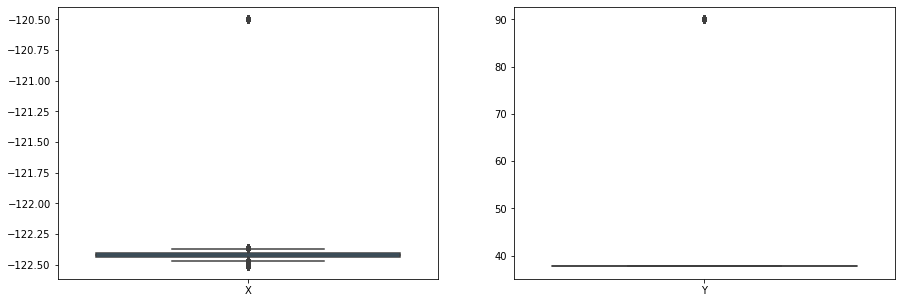

In [ ]:
#Checking For Outliers
figure, axs = plt.subplots(1,2,figsize = (15,5))
sns.boxplot(data = train[["X"]],ax=axs[0])
sns.boxplot(data = train[["Y"]],ax=axs[1])
#We can see there are outliers in X at -120.5 and Y at 90.0 so we will remove them in the next step

In [ ]:
train.drop_duplicates(inplace=True)
train.replace({'X': -120.5, 'Y': 90.0}, np.NaN, inplace=True)
test.replace({'X': -120.5, 'Y': 90.0}, np.NaN, inplace=True)

imp = SimpleImputer(strategy='mean')

for district in train['PdDistrict'].unique():
    train.loc[train['PdDistrict'] == district, ['X', 'Y']] = imp.fit_transform(train.loc[train['PdDistrict'] == district, ['X', 'Y']])
    test.loc[test['PdDistrict'] == district, ['X', 'Y']] = imp.transform(test.loc[test['PdDistrict'] == district, ['X', 'Y']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

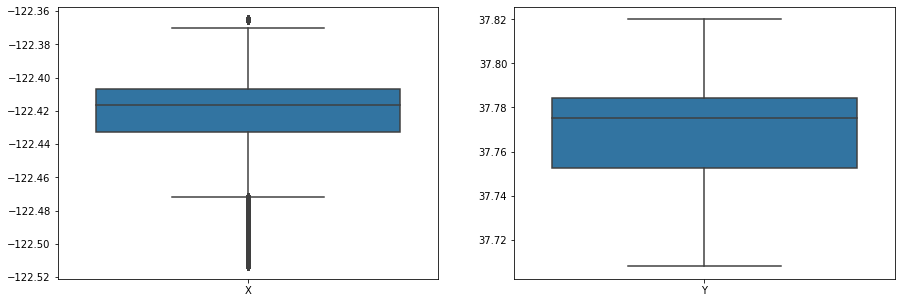

In [ ]:
#Box Plot after removing outliers
figure, axs = plt.subplots(1,2,figsize = (15,5))
sns.boxplot(data = train[["X"]],ax=axs[0])
sns.boxplot(data = train[["Y"]],ax=axs[1])

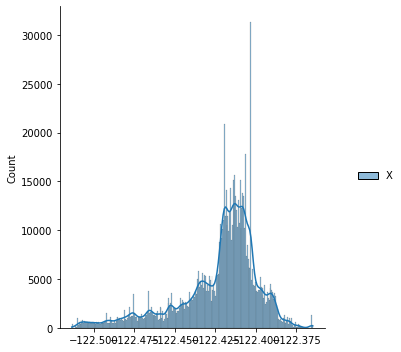

In [ ]:
train = train[train["Y"] < 80]
sns.displot(train[["X"]],kde=True)
plt.show()

# **Data Visualization and Preprocessing**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


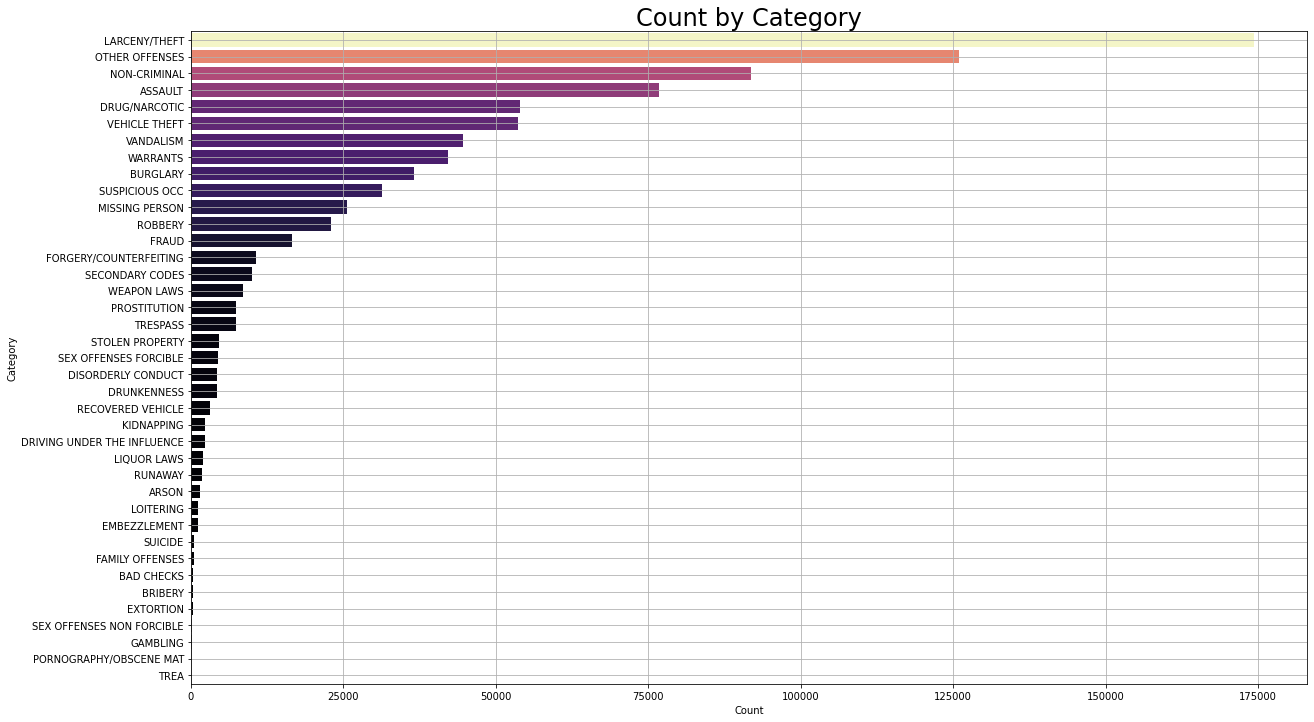

In [ ]:
data = train.groupby('Category').count()
data = data['Dates'].sort_values(ascending=False)

plt.figure(figsize=(20, 12))
ax = sns.barplot(data.values ,data.index,palette=cm.ScalarMappable(cmap='magma').to_rgba(data.values))

plt.title('Count by Category', fontdict={'fontsize': 24})
plt.xlabel('Count')
plt.grid()

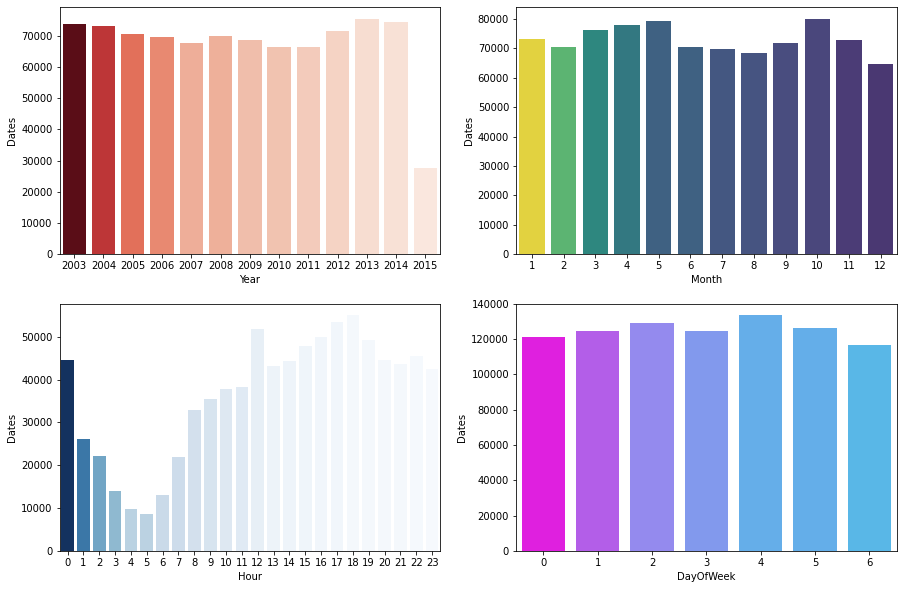

In [ ]:
train['DayOfWeek'] = train['Dates'].dt.weekday
train['Month'] = train['Dates'].dt.month
train['Year'] = train['Dates'].dt.year
train['Hour'] = train['Dates'].dt.hour

year = train.groupby('Year').count().iloc[:,0]
month = train.groupby('Month').count().iloc[:,0]
hour = train.groupby('Hour').count().iloc[:,0]
dayofweek = train.groupby('DayOfWeek').count().iloc[:, 0]

figure, axs = plt.subplots(2,2, figsize = (15,10))

sns.barplot(x=year.index, y= year,ax = axs[0][0],palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values))
sns.barplot(x=month.index, y= month,ax = axs[0][1],palette=cm.ScalarMappable(cmap='viridis').to_rgba(data.values))
sns.barplot(x=hour.index, y= hour,ax = axs[1][0],palette=cm.ScalarMappable(cmap='Blues').to_rgba(data.values))
sns.barplot(x=dayofweek.index, y= dayofweek,ax = axs[1][1],palette=cm.ScalarMappable(cmap='cool').to_rgba(data.values))
plt.show()

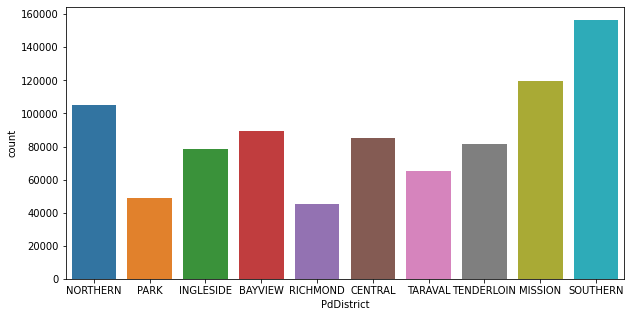

In [ ]:
##District Wise Crime Count
figure, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = train["PdDistrict"])
plt.show()

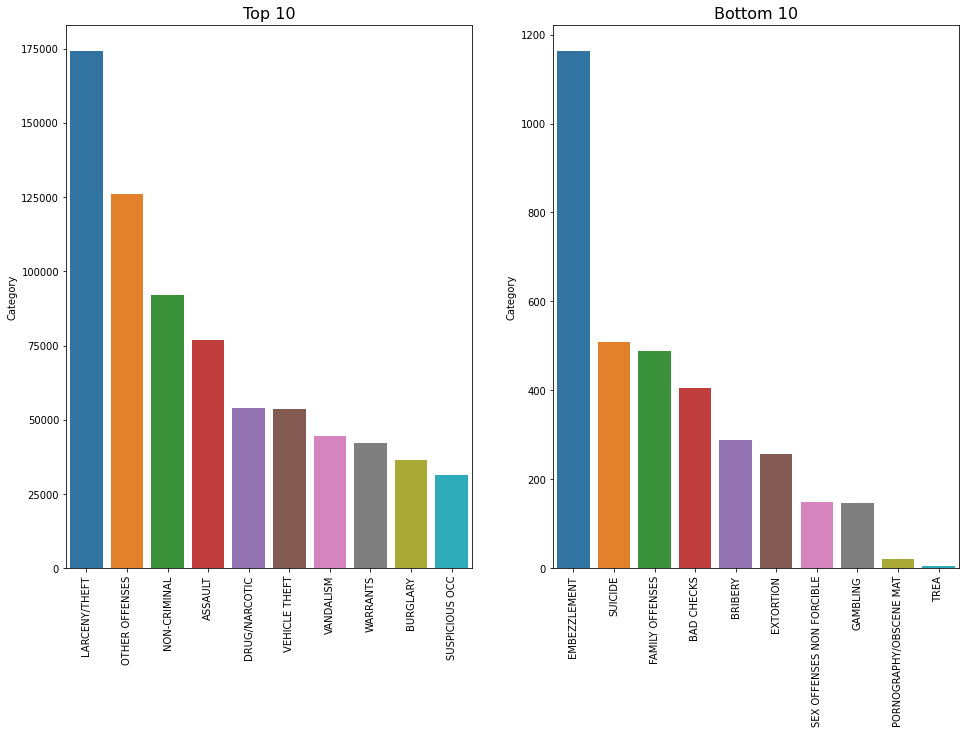

In [ ]:
#Top 10 and the least 10 occuring crimes
df_cr=pd.DataFrame(train['Category'].value_counts())
df_cr.tail()
plt.figure(figsize=(16,10))
ax1 =  plt.subplot2grid((1,2),(0,0))
ax1.set_title('Top 10', size=16)
sns.barplot(x=df_cr.head(10).index, y='Category', data=df_cr.head(10))
ax1.set_xticklabels(ax1.xaxis.get_ticklabels(), rotation=90)
ax2 =  plt.subplot2grid((1,2),(0,1))
ax2.set_title('Bottom 10', size=16)
sns.barplot(x=df_cr.tail(10).index, y='Category', data=df_cr.tail(10))
ax2.set_xticklabels(ax2.xaxis.get_ticklabels(), rotation=90)
plt.show()

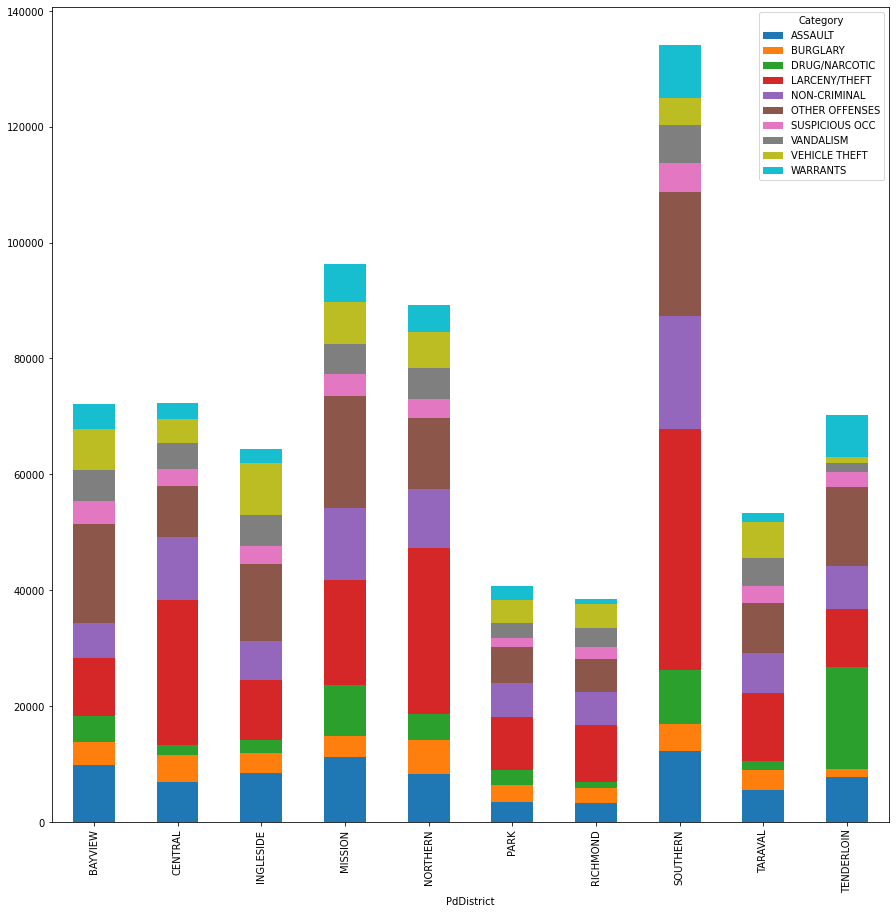

In [ ]:
#Plot of crimes count in the districts
top10cc=pd.Series(df_cr.head(10).index)
top10=train[train['Category'].isin(top10cc)]
tmp=pd.DataFrame(top10.groupby(['PdDistrict','Category']).size(), columns=['count'])
tmp.reset_index(inplace=True)
tmp=tmp.pivot(index='PdDistrict',columns='Category',values='count')
fig, axes = plt.subplots(1,1,figsize=(15,15))
tmp.plot(ax=axes,kind='bar', stacked=True)

# **Feature Engineering**

The feature engineering begins by encoding the categorical features (Day of the week, PD district, address and category) using a LabelEncoder.

Now the year, month, day, hour and minute variables are extracted out of the 'date' feature and added to the dataset

The final piece of feature engineering which is done is binning the month, hour and day features.

In [ ]:
def feature_engineering(data):
    data['Date'] = pd.to_datetime(data['Dates'].dt.date)
    data['n_days'] = (data['Date'] - data['Date'].min()).apply(lambda x: x.days)
    data['Day'] = data['Dates'].dt.day
    data['DayOfWeek'] = data['Dates'].dt.weekday
    data['Month'] = data['Dates'].dt.month
    data['Year'] = data['Dates'].dt.year
    data['Hour'] = data['Dates'].dt.hour
    data['Minute'] = data['Dates'].dt.minute
    data['Block'] = data['Address'].str.contains('block', case=False).apply(lambda x: 1 if x == True else 0)
    data["X-Y"] = data["X"] - data["Y"]
    data["XY"] = data["X"] + data["Y"]
    data.drop(columns=['Dates','Date','Address'], inplace=True)
    return data
train = feature_engineering(train)
test = feature_engineering(test)
train.drop(columns=['Descript','Resolution'], inplace=True)

In [ ]:
train

,Category,DayOfWeek,PdDistrict,X,Y,Month,Year,Hour,n_days,Day,Minute,Block,X-Y,XY
0,WARRANTS,2,NORTHERN,-122.425892,37.774599,5,2015,23,4510,13,53,0,-160.200490,-84.651293
1,OTHER OFFENSES,2,NORTHERN,-122.425892,37.774599,5,2015,23,4510,13,53,0,-160.200490,-84.651293
2,OTHER OFFENSES,2,NORTHERN,-122.424363,37.800414,5,2015,23,4510,13,33,0,-160.224777,-84.623949
3,LARCENY/THEFT,2,NORTHERN,-122.426995,37.800873,5,2015,23,4510,13,30,1,-160.227868,-84.626123
4,LARCENY/THEFT,2,PARK,-122.438738,37.771541,5,2015,23,4510,13,30,1,-160.210279,-84.667196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,0,TARAVAL,-122.459033,37.714056,1,2003,0,0,6,15,0,-160.173089,-84.744977
878045,LARCENY/THEFT,0,INGLESIDE,-122.447364,37.731948,1,2003,0,0,6,1,1,-160.179311,-84.715416
878046,LARCENY/THEFT,0,SOUTHERN,-122.403390,37.780266,1,2003,0,0,6,1,0,-160.183656,-84.623125
878047,VANDALISM,0,SOUTHERN,-122.390531,37.780607,1,2003,0,0,6,1,0,-160.171138,-84.609924


# **Encoding**

In [ ]:
le1 = LabelEncoder()
train['PdDistrict'] = le1.fit_transform(train['PdDistrict'])
test['PdDistrict'] = le1.transform(test['PdDistrict'])

le2 = LabelEncoder()
X = train.drop(columns=['Category'])
y= le2.fit_transform(train['Category'])

In [ ]:
train

,Category,DayOfWeek,PdDistrict,X,Y,Month,Year,Hour,n_days,Day,Minute,Block,X-Y,XY
0,WARRANTS,2,4,-122.425892,37.774599,5,2015,23,4510,13,53,0,-160.200490,-84.651293
1,OTHER OFFENSES,2,4,-122.425892,37.774599,5,2015,23,4510,13,53,0,-160.200490,-84.651293
2,OTHER OFFENSES,2,4,-122.424363,37.800414,5,2015,23,4510,13,33,0,-160.224777,-84.623949
3,LARCENY/THEFT,2,4,-122.426995,37.800873,5,2015,23,4510,13,30,1,-160.227868,-84.626123
4,LARCENY/THEFT,2,5,-122.438738,37.771541,5,2015,23,4510,13,30,1,-160.210279,-84.667196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,0,8,-122.459033,37.714056,1,2003,0,0,6,15,0,-160.173089,-84.744977
878045,LARCENY/THEFT,0,2,-122.447364,37.731948,1,2003,0,0,6,1,1,-160.179311,-84.715416
878046,LARCENY/THEFT,0,7,-122.403390,37.780266,1,2003,0,0,6,1,0,-160.183656,-84.623125
878047,VANDALISM,0,7,-122.390531,37.780607,1,2003,0,0,6,1,0,-160.171138,-84.609924


# **Model**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import time 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid1 = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search1 = GridSearchCV(estimator=tree_clas, param_grid=param_grid1, cv=4, verbose=True)
grid_search1.fit(x_train, y_train)

In [ ]:
final_model1 = grid_search1.best_estimator_
final_model1

In [ ]:
#Fitting data in Decision Tree
dtree = DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1024, splitter='best')
start=time.time()
dtree.fit(x_train,y_train)
end=time.time()
print (end-start)
print(psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2)

2.4322855472564697
11154.40234375


In [ ]:
start=time.time()
y_pred11 = dtree.predict(x_test)
end=time.time()
print (end-start)
print(psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2)

0.04886484146118164
11154.40234375


In [ ]:
accuracy_score(y_pred11,y_test)

In [ ]:
y_pred12 = dtree.predict_proba(x_test)
predicted_loss1 = np.array(y_pred12)
print(log_loss(y_test, predicted_loss1))

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid2 = {'n_estimators' : [10, 100],
              'max_depth' : [ 8, 15, 25, 30],
              'min_samples_split' :[5, 10, 15, 100],
               'min_samples_leaf' : [ 2, 5, 10] ,
               'max_features' : ['auto', 'sqrt', 'log2']
             }
forest = RandomForestClassifier()
grid_search2 = GridSearchCV(estimator=forest, param_grid=param_grid2, cv=4, verbose=True)
grid_search2.fit(x_train[0:40000], y_train[0:40000])

In [ ]:
final_model2 = grid_search2.best_estimator_
final_model2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
start=time.time()
rfc.fit(x_train, y_train)
end=time.time()
print (end-start)
print(psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2)

241.29463839530945
11157.578125


In [ ]:
start=time.time()
rfc_pred = rfc.predict(x_test)
end=time.time()
print (end-start)
print(psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2)

14.080450296401978
11154.21484375


In [ ]:
accuracy_score(rfc_pred,y_test)

In [ ]:
rfc_pred2 = rfc.predict_proba(x_test)
predicted_loss2 = np.array(rfc_pred2)
print(log_loss(y_test, predicted_loss2))

# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid3 = {'n_neighbors' : range(1, 21, 2),
              'weights' : ['uniform', 'distance'],
              'metric' : ['euclidean', 'manhattan', 'minkowski']
             }
knn = KNeighborsClassifier()
grid_search3 = GridSearchCV(estimator=knn, param_grid=param_grid3, cv=4, verbose=True)
grid_search3.fit(x_train, y_train)

In [ ]:
final_model3 = grid_search3.best_estimator_
final_model3

In [ ]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='distance')
start=time.time()
knn=knn.fit(x_train, y_train)
end=time.time()
print (end-start)
print(psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2)

3.7770819664001465
10725.4921875


In [ ]:
start=time.time()
y_pred_knn = knn.predict(x_test)
end=time.time()
print (end-start)
print(psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2)

13.248713254928589
10725.49609375


In [ ]:
accuracy_score(y_pred_knn,y_test)

In [ ]:
y_pred_knn2 = knn.predict_proba(x_test)
predicted_loss4 = np.array(y_pred_knn2)
print(log_loss(y_test, predicted_loss4))

# AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

ada=AdaBoostClassifier()

search_grid4={'n_estimators':[100,300,500],
             'learning_rate':[.001,0.01,.1],
             'algorithm' : ['SAMME', 'SAMME.R']
             }

search4=GridSearchCV(estimator = ada, param_grid = search_grid4, cv = 4, verbose=True)
search4.fit(x_train[0:50000],y_train[0:50000])

In [ ]:
final_model4 = search4.best_estimator_
final_model4

In [ ]:
clf =AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1, n_estimators=100, random_state=None)
start=time.time()
clf.fit(x_train, y_train)
end=time.time()
print (end-start)
print(psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2)

196.0300920009613
10725.4609375


In [ ]:
start=time.time()
y_pred_test_clf = clf.predict(x_test)
end=time.time()
print (end-start)
print(psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2)

24.163609981536865
10725.45703125


In [ ]:
accuracy_score(y_pred_test_clf,y_test)

In [ ]:
y_pred_test_clf2 = clf.predict_proba(x_test)
predicted_loss66 = np.array(y_pred_test_clf2)
print(log_loss(y_test, predicted_loss66))